# Kmeans Lab @ Telecom SudParis

# Lab: MNIST Clustering using kmeans

This nootebook contains a PYTHON implementation of image clustering, based on kmeans algorithm.
K-means clustering (MacQueen 1967) is one of the most commonly used unsupervised machine learning algorithm for partitioning a given data set into a set of k groups (i.e. k clusters), where k represents the number of groups pre-specified by the analyst. It classifies objects in multiple groups (i.e., clusters), such that objects within the same cluster are as similar as possible (i.e., high intra-class similarity), whereas objects from different clusters are as dissimilar as possible (i.e., low inter-class similarity). In k-means clustering, each cluster is represented by its center (i.e, centroid) which corresponds to the mean of points assigned to the cluster. [link](https://www.datanovia.com/en/lessons/k-means-clustering-in-r-algorith-and-practical-examples/)

This Lab demonstartes the use of kmeans, an algorithm of unsupervided learning. The basic idea behind k-means clustering consists of defining clusters so that the total intra-cluster variation (known as total within-cluster variation) is minimized.

We will be using Python to help us develop this model

@inproceedings{MacQueen1967,
  added-at = {2011-01-11T13:35:01.000+0100},
  author = {MacQueen, J. B.},
  biburl = {https://www.bibsonomy.org/bibtex/25dcdb8cd9fba78e0e791af619d61d66d/enitsirhc},
  booktitle = {Proc. of the fifth Berkeley Symposium on Mathematical Statistics and Probability},
  editor = {Cam, L. M. Le and Neyman, J.},
  interhash = {8d7d4dfe7d3a06b8c9c3c2bb7aa91e28},
  intrahash = {5dcdb8cd9fba78e0e791af619d61d66d},
  keywords = {kmeans clustering},
  pages = {281-297},
  publisher = {University of California Press},
  timestamp = {2011-01-11T13:35:01.000+0100},
  title = {Some Methods for Classification and Analysis of MultiVariate Observations},
  volume = 1,
  year = 1967
}

# Demo:

To run the demo, you should complete all following TODO.
The Face Recognition system includes the following  main steps:

1. Import the needed packages
2. Load the dataset
3. Compute PCA directly using PYTHON library
4. Apply K-means
5. Results Analysis
6. Plot results
7. Accuracy

## Import the needed packages

In [1]:
###We use different clustering algs on face datasets
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from time import time
from scipy.stats import mode
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cluster
import scipy.stats as st
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import cluster
from sklearn.decomposition import PCA

import numpy as np
from numpy import cov
from numpy.linalg import eig

# Load the dataset

In [2]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


############################################
#######TODO 1: Print dataset statistics#####
############################################

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

11501568/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples


# Compute PCA directly using PYTHON library 

In [3]:
n_components = 50

print( "Extracting the top %d eigen vectors from %d faces" % (n_components, X_train.shape[0]) )
t0 = time()

#########################################################################################
#######TODO 7: Create an instance of PCA, initializing with            ##################
#######        n_components=n_components and whiten=True               ##################
#########################################################################################

pca = PCA(n_components=n_components, whiten=True, svd_solver='randomized')

#########################################################################################
#######TODO 8: pass the training dataset (X_train) to pca's 'fit()' method   ############
#########################################################################################

pca = pca.fit(X_train)


print("done in %0.3fs" % (time() - t0))

Extracting the top 50 eigen vectors from 60000 faces
done in 4.326s


### Projection

In [4]:
#The components (“eigenfaces”) are ordered by their importance from top-left to bottom-right. We see that the first few components seem to primarily take care of lighting conditions; the remaining components pull out certain identifying features: the nose, eyes, eyebrows, etc.

#########################################################################################
#######TODO 9: With this projection computed, we can now project        #################
#######        our original training and test data onto the PCA basis:  #################
#########################################################################################

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(60000, 50)
(10000, 50)


# Apply K-means

We can observe that some of the clusters correspond to people with very distinct faces. 
Agglomerative clustering and k-Means are much more likely to create clusters of even size, but we do need to set a number of clusters. We use the KMeans class of the cluster module to calculate the result of the K-Means, using the fit method on the test data (10,000 images)

In [5]:
n_clusters = 10
# extract clusters with k-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=0, max_iter=10000, algorithm="full")
clusters = kmeans.fit_predict(X_test)
print("******** KMEANS completed ********")

## Compute the number of points per class
print("cluster sizes k-Means: %s" % np.bincount(clusters))
###[76  46  71  48 110 154 124 160 102  75]

### The shape of centers
print("The dimension of centers: %s" % np.array(kmeans.cluster_centers_.shape))


******** KMEANS completed ********
cluster sizes k-Means: [1194 1100  915  809  810 1318 1239  875  863  877]
The dimension of centers: [ 10 784]


Visualize the cluster centers. As we clustered in the representation produced by PCA, 
we need to rotate the cluster centers, using pca.inverse_transform

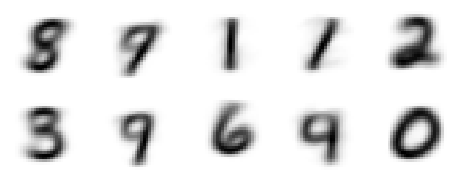

In [6]:
#fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(12, 4))
#for center, ax in zip(kmeans.cluster_centers_, axes.ravel()):
#    ax.imshow(pca.inverse_transform(center).reshape([h,w]), vmin=0, vmax=255)
#plt.show()

fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 28, 28)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

# Results analysis

We will then analyze the result of each cluster, by analyzing the distribution of the classes (categories of digits from 0 to 9):

In [7]:
class_hists = np.zeros((10,10))
entropies = np.zeros(10)
for i in range(10):
 y_predi = y_test[kmeans.labels_==i]
 class_hists[i,:] = np.histogram(y_predi, range=(0,9))[0]
 entropies[i] = st.entropy(class_hists[i,:])

print("Matrix of cluster vs class distribution \n", class_hists)
print("entropies=", entropies)

Matrix of cluster vs class distribution 
 [[ 62.   1.  20. 146.   1. 331.  46.   1. 572.  14.]
 [ 13.   0.  15.  10. 275. 111.   3. 402.  51. 220.]
 [  0. 643.  45.  59.  24.  26.  42.  32.  26.  18.]
 [  3. 486. 113.   8.  21.  56.  16.  48.  51.   7.]
 [  6.   0. 702.  49.   3.   8.  17.  10.  13.   2.]
 [ 55.   3.  63. 706.   0. 286.   2.   0. 197.   6.]
 [  2.   0.   8.  14. 258.  28.   2. 436.  33. 458.]
 [ 23.   2.  22.   5.  19.  11. 783.   0.   7.   3.]
 [  3.   0.  27.   9. 380.  30.  26.  98.  17. 273.]
 [813.   0.  17.   4.   1.   5.  21.   1.   7.   8.]]
entropies= [1.38265513 1.58001856 1.20667023 1.38763848 0.6128818  1.27617219
 1.34832051 0.52733922 1.44761376 0.38694797]


# Plot results

In [8]:
indmin = np.argmin(entropies)
indmax = np.argmax(entropies)

print("Cluster ", indmin," with minimum entropy =",entropies[indmin])
imc = X_test[kmeans.labels_==indmin]
plt.figure(figsize=(7.195, 3.841), dpi=300)
for i in range(200):
 plt.subplot(10,20,i+1)
 plt.imshow(imc[i,:].reshape([28,28]), cmap='gray')
 plt.axis('off')

print("Cluster ", indmax," with maximum entropy =",entropies[indmax])
imc = X_test[kmeans.labels_==indmax]
plt.figure(figsize=(7.195, 3.841), dpi=300)
for i in range(200):
 plt.subplot(10,20,i+1)
 plt.imshow(imc[i,:].reshape([28,28]), cmap='gray')
 plt.axis('off')

Cluster  9  with minimum entropy = 0.3869479724326237
Cluster  1  with maximum entropy = 1.5800185553730433


# Accuracy

We will now focus on calculating the classification rate obtained by the unsupervised learning algorithm, if we associate a cluster with a class:

In [11]:
# mapping cluster -> class
class_cluster = np.zeros(10)
accuracies = np.zeros(10) # accuracy of each cluster
indentropy = np.argsort(entropies) # we rank clusters according to entropy

class_cluster[:]=-1
class_cluster[indentropy[0]] = int(np.argmax(class_hists[indentropy[0],:])) # 1st cluster: class with min entropy
# Look in the class_histsmatrix at the cluster and class index positions
accuracies[indentropy[0]] = class_hists[int(indentropy[0]),int(class_cluster[indentropy[0]])] / np.sum(class_hists[indentropy[0],:])

for i in range(1,10):
 # New cluster index indsorted is the ist cluster in the sorted entropy list
 # We sosrt the class by increasing order of the class occurence
 indsorted = np.argsort(class_hists[int(indentropy[i]),:])
 # If the resulting class has already been attributed, we look for the next candidate
 cpt = 9
 while(list(np.where(class_cluster==indsorted[cpt])[0]) != []):
  cpt = cpt-1

 class_cluster[indentropy[i]] = int(indsorted[cpt])
 accuracies[indentropy[i]] = class_hists[int(indentropy[i]),int(class_cluster[indentropy[i]])] / np.sum(class_hists[int(indentropy[i]),:])


print("accuracies: \n", accuracies)
print("class_cluster: \n", class_cluster)

ypred = class_cluster[kmeans.labels_]
acc = np.where( ypred != y_test , 0.,1.).mean()*100.0

accuracies: 
 [0.47906198 0.36545455 0.70273224 0.06922126 0.86666667 0.53566009
 0.36965295 0.89485714 0.44032445 0.92702395]
class_cluster: 
 [8. 7. 1. 5. 2. 3. 9. 6. 4. 0.]


In [12]:
print("acc: \n", acc)

acc: 
 55.15
